## Data & module Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from googletrans import Translator
import googletrans
%matplotlib inline

In [2]:
df_train = pd.read_csv('./data/sales_train.csv.gz',)
df_test = pd.read_csv('./data/test.csv.gz')
df_items = pd.read_csv('./data/items.csv')
df_item_categories = pd.read_csv('./data/item_categories.csv')
df_shop = pd.read_csv('./data/shops.csv')
df_sample_submission = pd.read_csv('./data/sample_submission.csv.gz')

## Data shape & structure
###  df_train
* date : 2013년 2월 부터 2015년 10월 까지
* date_block_num : 2013년 1월 부터 2015년 12월 까지 순서대로(0~33)
* shop_id
* item_price
* item_cnt_day : 판매량(마이너스 경우 반품), train의 Y값


* shape : (2935849, 6)
* 수치형 : item_price, item_cnt_day // 카테고리형 : date, date_block_num, shop_id, itme_id


### df_test
* ID : Key index
* shop_id
* item_id


* shape : (214200, 3)
* Target : item_cnt_day

In [3]:
df_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
np.sort(df_train['shop_id'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59], dtype=int64)

In [5]:
df_test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [6]:
np.sort(df_test['shop_id'].unique())

array([ 2,  3,  4,  5,  6,  7, 10, 12, 14, 15, 16, 18, 19, 21, 22, 24, 25,
       26, 28, 31, 34, 35, 36, 37, 38, 39, 41, 42, 44, 45, 46, 47, 48, 49,
       50, 52, 53, 55, 56, 57, 58, 59], dtype=int64)

In [7]:
df_items.head() # item_name이 키릴 문자로 변환 해서 지역명을 볼 수 있도록 하겠음

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [9]:
df_shop.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [10]:
df_item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [11]:
df_items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


### 키릴 문자 Translate 함수
* df_itmes['item_name]  
JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [12]:
translator = Translator()

In [13]:

def russian_translate(series):
    translator = Translator()
    translate = lambda x : ((translator.translate(x, dest='en',src='ru')).text)
    value = np.array(list(map(translate,series.values)))
    return np.reshape(value,(-1,1))

In [14]:
df_item_categories['item_category_name']= russian_translate(df_item_categories['item_category_name'])
df_shop['shop_name']=russian_translate(df_shop['shop_name'])

# df_items['item_name']=russian_translate(df_items['item_name'])
# JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [20]:
df_item_categories.head()

,item_category_name,item_category_id
0,PC - Headsets / Headphones,0
1,Accessories - PS2,1
2,Accessories - PS3,2
3,Accessories - PS4,3
4,Accessories - PSP,4


In [21]:
df_shop.head()

,shop_name,shop_id
0,"Yakutsk Ordzhonikidze, 56 francs",0
1,"Yakutsk TC ""Central"" franc",1
2,"Adygea Shopping Center ""Mega""",2
3,"Balashikha TRK ""October-Kinomir""",3
4,"Volzhsky shopping center ""Volga Mall""",4


## 가설 적용전 Train data 통계정보, 상관관계 및 결측치, 특이사항 파악
1. 결측치
    - 없음
    
    
2. 통계정보
    - item_price : min -1(가격에 음의 값), max 이상값
    - item_cnt_day : min -22, max 이상값


3. 상관관계
    - 유의미한 정보는 없음
    - date_block_num , item_price = 0.1
    - item_id, item_price = -0.13
    - 월과 상품가격(+), 상품ID와 상품가격(-) 

In [22]:
df_train[df_train.isnull()].count()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [23]:
pd.set_option('display.float_format', lambda x : '%.2f' % x) # 소수 둘째 자리까지 보이도록

In [24]:
df_train.describe() # Item_price, item_cnt_day와 같은 연속형 값 기준 확인할 것

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2935849.00,2935849.00,2935849.00,2935849.00,2935849.00
mean,14.57,33.00,10197.23,890.85,1.24
std,9.42,16.23,6324.30,1729.80,2.62
min,0.00,0.00,0.00,-1.00,-22.00
25%,7.00,22.00,4476.00,249.00,1.00
50%,14.00,31.00,9343.00,399.00,1.00
75%,23.00,47.00,15684.00,999.00,1.00
max,33.00,59.00,22169.00,307980.00,2169.00


In [25]:
# df_train.item_price.plot(kind='hist',xlim=(0,4000),bins=700)

In [26]:
# df_train.item_cnt_day.plot(kind='hist',xlim=(-2.5,8),bins=700)

In [27]:
#attributes = df_train.columns.tolist()

In [28]:
#pd.scatter_matrix(df_train[attributes],figsize = (24,16))

- item_ptrice와 item_cnt_day가 음의 상관관계를 보이는 것 같음

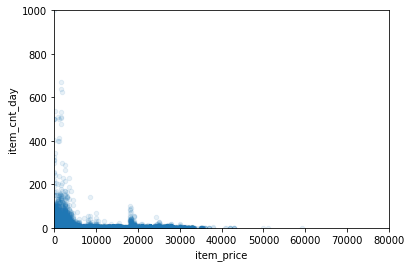

In [29]:
df_train.plot(kind = "scatter", x = "item_price", y="item_cnt_day",alpha = 0.1, xlim=(0,80000),ylim=(0,1000))

In [30]:
#df_train.corr()
#corr
#date_block_num , item_price = 0.1
#item_id, item_price = -0.13

# 가설
1. 지역의 영향 (대도시권, 중소규모 도시)

2. On, Off line 매장 구분의 영향

3. 상품 카테고리별 영향

4. 프로모션의 영향

### 1. 지역의 영향
* shop_name에서 지역명만 추출 - str split 사용해서 이름 요소별 칼럼화

In [31]:
df_shop.head()

,shop_name,shop_id
0,"Yakutsk Ordzhonikidze, 56 francs",0
1,"Yakutsk TC ""Central"" franc",1
2,"Adygea Shopping Center ""Mega""",2
3,"Balashikha TRK ""October-Kinomir""",3
4,"Volzhsky shopping center ""Volga Mall""",4


In [32]:
shop_name_split = df_shop['shop_name'].str.split(' ',expand=True)
shop_name_split.head()

,0,1,2,3,4,5,6
0,Yakutsk,"Ordzhonikidze,",56,francs,None,None,None
1,Yakutsk,TC,"""Central""",franc,None,None,None
2,Adygea,Shopping,Center,"""Mega""",None,None,None
3,Balashikha,TRK,"""October-Kinomir""",None,None,None,None
4,Volzhsky,shopping,center,"""Volga","Mall""",None,None


In [33]:
location_name = shop_name_split[[0]]
location_name.rename(columns={0:'location_name'},inplace=True)
location_name.head()

c:\users\cch88\miniconda3\envs\ml_python\lib\site-packages\pandas\core\frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,location_name
0,Yakutsk
1,Yakutsk
2,Adygea
3,Balashikha
4,Volzhsky


In [34]:
df_shop=pd.concat([df_shop,location_name],axis=1)
df_shop.head()

,shop_name,shop_id,location_name
0,"Yakutsk Ordzhonikidze, 56 francs",0,Yakutsk
1,"Yakutsk TC ""Central"" franc",1,Yakutsk
2,"Adygea Shopping Center ""Mega""",2,Adygea
3,"Balashikha TRK ""October-Kinomir""",3,Balashikha
4,"Volzhsky shopping center ""Volga Mall""",4,Volzhsky


#### Russia population Census 참고
* 2014년 census 정보만 가져올것임
* https://gist.githubusercontent.com/logvik/cf787bda80a8aa125c84/raw/2749e1679670baad67fd9361feb7cb5437f2d8ad/population.csv csv 파일
* Oblast,Krai는 주를 의미 (람다 식의 적용으로 제거)

In [35]:
df_population = pd.read_csv('./data/population.csv')
df_population.head()

,Code,Name,year1959,year1970,year1979,year1989,year2002,year2010,year2013,year2014
0,MOW,Moscow,5085581,7061008,8010954,8967232,10382754,11503501,11979529,12108257
1,MOS,Moscow Oblast,5863003,5774529,6359385,6693623,6618538,7095120,7048084,7133620
2,KDA,Krasnodar Krai,3477809,4124163,4410331,4680560,5125221,5226647,5330181,5404273
3,SPE,St. Petersburg,3321196,3949501,4588183,5023506,4661219,4879566,5028000,5131942
4,SVE,Sverdlovsk Oblast,4044416,4319741,4453491,4716768,4486214,4297747,4315830,4320677


In [36]:
df_population.drop(df_population.columns[2:-1], axis=1, inplace= True)
df_population.drop(['Code'],axis=1,inplace=True)

In [37]:
df_population.head()

,Name,year2014
0,Moscow,12108257
1,Moscow Oblast,7133620
2,Krasnodar Krai,5404273
3,St. Petersburg,5131942
4,Sverdlovsk Oblast,4320677


In [38]:
re = lambda x : x.replace(' Oblast','') #Oblast와 Krai는 주의 개념으로 df_shop의 주소 내용에 없는 내용임
re_2 = lambda x : x.replace(' Krai','')
df_population['Name'] = df_population['Name'].apply(re)
df_population['Name'] = df_population['Name'].apply(re_2)
df_population.drop(1,inplace=True)# 모스크바 도심과 광역 중 도심만 선택

In [39]:
df_population.head()

,Name,year2014
0,Moscow,12108257
2,Krasnodar,5404273
3,St. Petersburg,5131942
4,Sverdlovsk,4320677
5,Rostov,4245532


#### df_shop과 df_population merge
* 지역명 기준으로 merge 23개 지역이 인구수 Nan값 데이터 파일에 도시명과 지역명이 상이한 경우임

In [40]:
df_shop = pd.merge(df_shop, df_population, left_on='location_name', right_on='Name',how='left')
df_shop.head()

,shop_name,shop_id,location_name,Name,year2014
0,"Yakutsk Ordzhonikidze, 56 francs",0,Yakutsk,NaN,nan
1,"Yakutsk TC ""Central"" franc",1,Yakutsk,NaN,nan
2,"Adygea Shopping Center ""Mega""",2,Adygea,NaN,nan
3,"Balashikha TRK ""October-Kinomir""",3,Balashikha,NaN,nan
4,"Volzhsky shopping center ""Volga Mall""",4,Volzhsky,NaN,nan


In [42]:
df_shop[df_shop['year2014'].isnull()]

,shop_name,shop_id,location_name,Name,year2014
0,"Yakutsk Ordzhonikidze, 56 francs",0,Yakutsk,NaN,nan
1,"Yakutsk TC ""Central"" franc",1,Yakutsk,NaN,nan
2,"Adygea Shopping Center ""Mega""",2,Adygea,NaN,nan
3,"Balashikha TRK ""October-Kinomir""",3,Balashikha,NaN,nan
4,"Volzhsky shopping center ""Volga Mall""",4,Volzhsky,NaN,nan
9,Outbound Trade,9,Outbound,NaN,nan
10,Zhukovsky Str. Chkalov 39m?,10,Zhukovsky,NaN,nan
11,Zhukovsky Str. Chkalov 39 m²,11,Zhukovsky,NaN,nan
12,Online shop Emergency,12,Online,NaN,nan
13,"Kazan Shopping Center ""Bahetle""",13,Kazan,NaN,nan


In [45]:
df_shop.loc[[42,43],['year2014']]=5131942
#상트 페테르 부르크 표기 차이

df_shop.loc[[12,55],['year2014']]=10000000 #임의값
#러시아 인터넷 유저 8천만 중 1/8

df_shop.loc[[9],['year2014']]=3000000 #임의값

In [46]:
df_shop[df_shop['year2014'].isnull()] # 추가 인구 결측치 지역은 딕트 형태로 태깅후 어플라이 시키겠음

,shop_name,shop_id,location_name,Name,year2014
0,"Yakutsk Ordzhonikidze, 56 francs",0,Yakutsk,NaN,nan
1,"Yakutsk TC ""Central"" franc",1,Yakutsk,NaN,nan
2,"Adygea Shopping Center ""Mega""",2,Adygea,NaN,nan
3,"Balashikha TRK ""October-Kinomir""",3,Balashikha,NaN,nan
4,"Volzhsky shopping center ""Volga Mall""",4,Volzhsky,NaN,nan
10,Zhukovsky Str. Chkalov 39m?,10,Zhukovsky,NaN,nan
11,Zhukovsky Str. Chkalov 39 m²,11,Zhukovsky,NaN,nan
13,"Kazan Shopping Center ""Bahetle""",13,Kazan,NaN,nan
14,"Kazan Shopping Center ""ParkHouse"" II",14,Kazan,NaN,nan
16,"Kolomna shopping center ""Rio""",16,Kolomna,NaN,nan


In [51]:
non_pop_index = df_shop[df_shop['year2014'].isnull()].index.tolist()

In [52]:
df_shop[df_shop['year2014'].isnull()]['location_name'].unique().tolist()

['Yakutsk',
 'Adygea',
 'Balashikha',
 'Volzhsky',
 'Zhukovsky',
 'Kazan',
 'Kolomna',
 'Mytischi',
 'N.Novgorod',
 'RostovNaDonu',
 'Sergiev',
 'Surgut',
 'Ufa',
 'Khimki',
 'Chekhov']

In [53]:
population_tag = {
'Yakutsk': 269601,
'Adygea':444403,
'Balashikha':215494,
'Volzhsky':314255,
'Zhukovsky':104736 ,
'Kazan':1143535,
'Kolomna':144589 ,
'Mytischi':173160 ,
'N.Novgorod':1250619,
'RostovNaDonu':1089261 ,
'Sergiev':111179 ,
'Surgut': 341000,
'Ufa': 1023000,
'Khimki':207425 ,
'Chekhov':60720
} #러시아 2014 Census 데이터

In [54]:
df_shop.loc[non_pop_index,['year2014']]=df_shop[df_shop['year2014'].isnull()].location_name.map(population_tag)

In [55]:
df_shop[df_shop['year2014'].isnull()]

,shop_name,shop_id,location_name,Name,year2014


In [58]:
df_shop.drop('Name',axis=1,inplace=True)
df_shop.head()

,shop_name,shop_id,location_name,year2014
0,"Yakutsk Ordzhonikidze, 56 francs",0,Yakutsk,269601.00
1,"Yakutsk TC ""Central"" franc",1,Yakutsk,269601.00
2,"Adygea Shopping Center ""Mega""",2,Adygea,444403.00
3,"Balashikha TRK ""October-Kinomir""",3,Balashikha,215494.00
4,"Volzhsky shopping center ""Volga Mall""",4,Volzhsky,314255.00


##### End df_shop tagg
* shop별 location과 population 칼럼 반영

In [61]:
df_shop.to_pickle('./data/df_shop_pp.picke')
df_item_categories.to_pickle('./data/df_item_categories_pp.picke')


In [62]:
## 피클 저장
#('./data/df_shop_pp.picke')
#('./data/df_item_categories_pp.picke')